### Problem Part C: Starfire (GMM Pizza Conundrum)

For the ladies, Slade is going more down the dinner date route. 

Starfire is a pizza fanatic. As attributed by the Teen Titans Go Movie, she simply loves all things pizza. Unfortunately, Slade is as clever in Algos as he is in Mind Control Manipulation.

Slade tries to give Starfire some sort of stomach pain by ‘falsely’ giving her instructions to make the famous Titans Pizza. Use GMM (Gaussian Mixture Models) clustering solution to help her avoid facing that particular pain, where each cluster is of the following 3 ingredients: pepperoni, cheese, and pineapple. 

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

# Import for making blobs that represent pizza toppings. 
from sklearn.datasets import make_blobs

In [18]:
# Solution: Use something 'similar' to Gaussian Mixture Model with Iris Flower Dataset. 

# Source: https://cmdlinetips.com/2021/03/gaussian-mixture-models-with-scikit-learn-in-python/
# Source (for GMM): https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html
#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py

# Make three 'blobs' of pizza toppings. 
# pepperoni: 1 center, 20 samples, random state = 0 
# cheese: 2 centers, 30 samples, random state = 99
# pineapple: 3 centers, 40 samples, random state = 999
pepperoni_x, pepperoni_y = make_blobs(n_samples=20,
                  centers=1, 
                  cluster_std=1,
                  random_state=0)

cheese_x, cheese_y = make_blobs(n_samples=30,
                  centers=2, 
                  cluster_std=1,
                  random_state=99)

pineapple_x, pineapple_y = make_blobs(n_samples=40,
                  centers=3, 
                  cluster_std=1,
                  random_state=999)

# Now, we apply dataframes for all three 'blobs'. 

data_pepperoni = pd.DataFrame(pepperoni_x)
data_pepperoni.columns=["Topping","Pain Point"]
data_pepperoni["cluster"]=pepperoni_y
data_pepperoni.head()


,Topping,Pain Point,cluster
0,-1.576720,4.957406,0
1,0.628358,4.460136,0
2,2.470349,4.098629,0
3,2.843828,3.326509,0
4,1.955008,6.544681,0


In [19]:
data_cheese = pd.DataFrame(cheese_x)
data_cheese.columns=["Topping","Pain Point"]
data_cheese["cluster"]=cheese_y
data_cheese.head()

,Topping,Pain Point,cluster
0,2.944006,0.352521,0
1,3.278522,0.446966,0
2,3.728833,1.091380,0
3,3.072085,-0.700403,0
4,3.469071,0.217769,0


In [20]:
data_pineapple = pd.DataFrame(pineapple_x)
data_pineapple.columns=["Topping","Pain Point"]
data_pineapple["cluster"]=pineapple_y
data_pineapple.head()

,Topping,Pain Point,cluster
0,-6.551584,3.949947,1
1,-6.349845,-2.472355,2
2,-9.196146,-2.470754,2
3,-7.877278,-2.875337,2
4,-9.182584,4.626792,1


<AxesSubplot:xlabel='Topping', ylabel='Pain Point'>

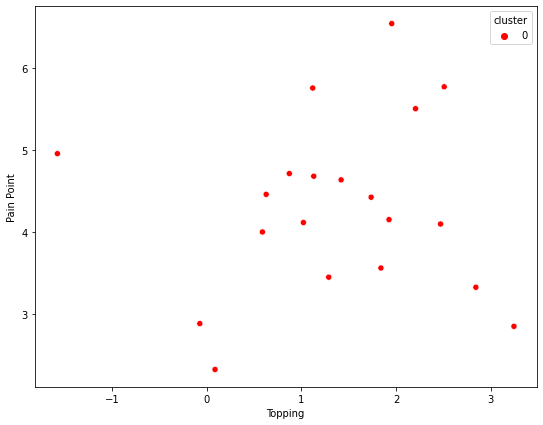

In [21]:
# We now plot three different types of clusters, with co-variance. 

# Seaborn python library plot.
import seaborn as sns

plt.figure(figsize=(9,7))
sns.scatterplot(data=data_pepperoni, 
                x="Topping",
                y="Pain Point", 
                hue="cluster",
                palette=["red"])

<AxesSubplot:xlabel='Topping', ylabel='Pain Point'>

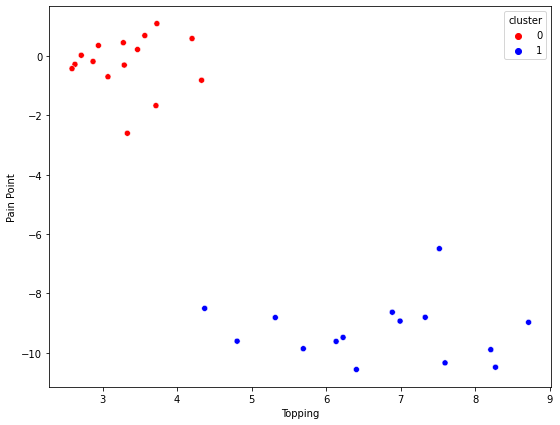

In [22]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data_cheese, 
                x="Topping",
                y="Pain Point", 
                hue="cluster",
                palette=["red","blue"])

<AxesSubplot:xlabel='Topping', ylabel='Pain Point'>

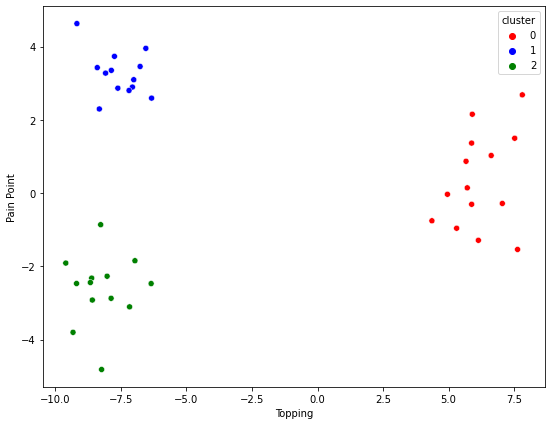

In [23]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data_pineapple, 
                x="Topping",
                y="Pain Point", 
                hue="cluster",
                palette=["red","blue","green"])

#### As shown in the above clusters, it looks like Starfire is 'safe' with most of the topping being pineapple, some it being pepperoni, and a very few amount of it being cheese. However, to truly verify 'safeness', we have to apply GMM to these clusters, and find out via a fitting of these GMM models which topping selection truly is the 'safest'. 

In [30]:
# GMM for pepperoni topping for the pizza. 
gmm_pepperoni = GaussianMixture(3, 
                     covariance_type='full', 
                     random_state=0).fit(data_pepperoni[["Topping","Pain Point"]])

# print out the means. 
print(gmm_pepperoni.means_)

[[0.81801706 4.02896282]
 [2.02582353 5.91965279]
 [2.28182951 3.83157864]]


In [31]:
# GMM for cheese topping for the pizza. 
gmm_cheese = GaussianMixture(3, 
                     covariance_type='full', 
                     random_state=0).fit(data_cheese[["Topping","Pain Point"]])

# print out the means. 
print(gmm_cheese.means_)

[[ 7.67623133 -9.07652239]
 [ 3.31551054 -0.23964241]
 [ 5.57094442 -9.49939858]]


In [32]:
# GMM for pineapple topping for the pizza. 
gmm_pineapple = GaussianMixture(3, 
                     covariance_type='full', 
                     random_state=0).fit(data_pineapple[["Topping","Pain Point"]])

# print out the means. 
print(gmm_pineapple.means_)

[[-7.55123756  3.25769534]
 [ 6.17738576  0.32458099]
 [-8.22529601 -2.62604041]]


We can now apply Label Encoding to fit the model better and get a better prediction.
#### In interest of time for the episode, BIC / AIC values will not be covered, but something that can be covered in a bonus Algos In 10 Episode, if time permits. The main focus for this problem is to get a 'better' fit for what type of safe toppings Starfire can choose for her Titans Pizza.

In [33]:
# Create the predicted data. 
labels_pepperoni = gmm_pepperoni.predict(data_pepperoni[["Topping","Pain Point"]])
labels_cheese = gmm_cheese.predict(data_cheese[["Topping","Pain Point"]])
labels_pineapple = gmm_pineapple.predict(data_pineapple[["Topping","Pain Point"]])

In [34]:
# Set the labels with predicted data. 
data_pepperoni[["predicted_cluster_pepperoni"]]=labels_pepperoni
data_cheese[["predicted_cluster_cheese"]]=labels_cheese
data_pineapple[["predicted_cluster_pineapple"]]=labels_pineapple 

<AxesSubplot:xlabel='Topping', ylabel='Pain Point'>

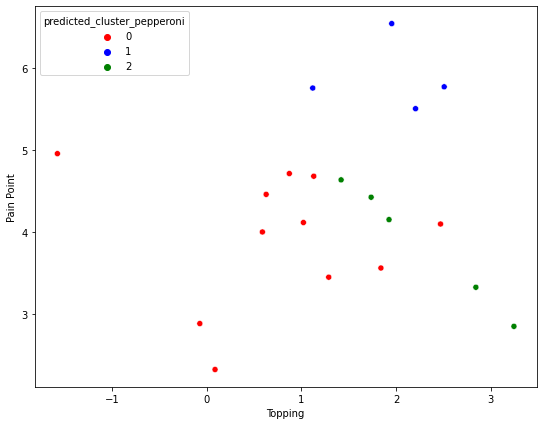

In [35]:
# Plot again, this time with predicted labels. 
# We this time combine all numbers of clusters together, because we are trying to compare them 
# via co-variance. 

plt.figure(figsize=(9,7))
sns.scatterplot(data=data_pepperoni, 
                x="Topping",
                y="Pain Point", 
                hue="predicted_cluster_pepperoni",
                palette=["red","blue","green"])

<AxesSubplot:xlabel='Topping', ylabel='Pain Point'>

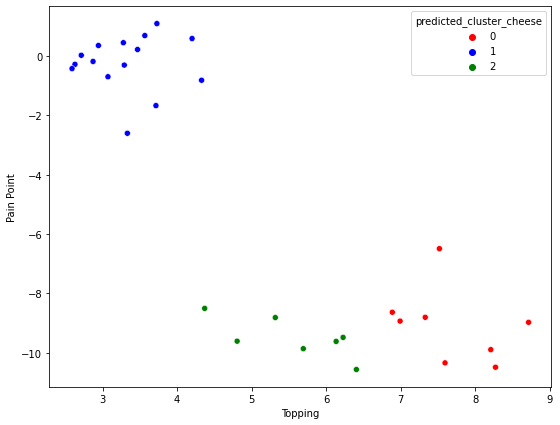

In [36]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data_cheese, 
                x="Topping",
                y="Pain Point", 
                hue="predicted_cluster_cheese",
                palette=["red","blue","green"])

<AxesSubplot:xlabel='Topping', ylabel='Pain Point'>

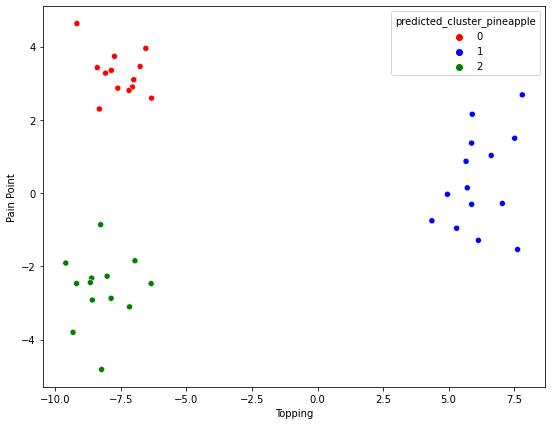

In [37]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data_pineapple, 
                x="Topping",
                y="Pain Point", 
                hue="predicted_cluster_pineapple",
                palette=["red","blue","green"])

In conclusion, from the graphs above, we can tell the 'safest' choice for Starfire to avoid pain while eating her Titans Pizza would be to mostly have it be with pineapple, some cheese, and hardly, if at all, any pepperoni. 

Sounds strange, right? This prediction is different than what we had with the previous graphs. This is why it is very important to make proper predictions for labels and data and not to misunderstand what it means by a 'cluster' (a collection of data points that tell a trend, not the other way around) in the GMM distribution. 

Bonus episode would include some BIC (Bayesian Information Criterion) / AIC (Akaike Information Criterion) metrics, for end of 2021. 